# Capstone Project – Baseline Machine Learning Models

## Research Question

How do renewable energy consumption and other emission-related factors
(such as CO₂ intensity, CO₂ per GDP, methane, and nitrous oxide emissions)
impact CO₂ emissions per capita across countries over time?


## Project Overview
This project focuses on analyzing historical CO₂ emissions data and building baseline machine learning regression models.  
The goal of this phase is to establish reliable benchmark models that will later be compared with advanced modeling techniques.



## Objective
The primary objective is to:
- Understand patterns in CO₂ emissions data  
- Build baseline regression models  
- Evaluate and compare their performance  
- Establish a benchmark for future advanced models


## Data Preparation
The dataset used in this notebook is the final cleaned and merged dataset.  
All preprocessing steps such as data cleaning, handling missing values, and merging multiple data sources were performed in a separate preprocessing file.


In [21]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error


In [75]:
#load dataset
df= pd.read_csv('/content/final_model_ready_dataset.csv')

In [76]:
# first few rows of dataset
df.head()

,country_name,year,CO2_per_capita,Renewable_Consumption_Pct,CO2_Intensity,CO2_per_GDP_PPP,Methane_CO2e,N2O_CO2e
0,Afghanistan,1990,0.191389,23,23.745049,23.745049,6735.57274,2841.412942
1,Afghanistan,1991,0.180674,23.7,28.254785,28.254785,7018.87361,2930.139362
2,Afghanistan,1992,0.126517,27.4,31.210332,31.210332,7124.43448,2886.076981
3,Afghanistan,1993,0.109106,28.5,31.040200,31.040200,7209.86285,2926.050600
4,Afghanistan,1994,0.096638,30.1,29.539308,29.539308,7462.89122,2758.944020


## Initial Data Inspection
Basic checks were performed to understand the structure, size, and data types of the dataset.


In [77]:
# to find the no.of rows and columns
df.shape


(6138, 8)

In [78]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6138 entries, 0 to 6137
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   country_name               6138 non-null   object 
 1   year                       6138 non-null   int64  
 2   CO2_per_capita             6138 non-null   float64
 3   Renewable_Consumption_Pct  6138 non-null   object 
 4   CO2_Intensity              6138 non-null   float64
 5   CO2_per_GDP_PPP            6138 non-null   float64
 6   Methane_CO2e               6138 non-null   float64
 7   N2O_CO2e                   6138 non-null   float64
dtypes: float64(5), int64(1), object(2)
memory usage: 383.8+ KB


In [79]:
df["Renewable_Consumption_Pct"].dtype


dtype('O')

In [80]:
df["Renewable_Consumption_Pct"] = pd.to_numeric(
    df["Renewable_Consumption_Pct"], errors="coerce"
)


In [81]:
df["Renewable_Consumption_Pct"].isna().sum()


np.int64(262)

In [82]:
df["Renewable_Consumption_Pct"].head(10)


,Renewable_Consumption_Pct
0,23.0
1,23.7
2,27.4
3,28.5
4,30.1
5,31.8
6,33.9
7,36.4
8,38.0
9,43.4


In [83]:
df["Renewable_Consumption_Pct"].dtype

dtype('float64')

In [85]:
# check duplicates
df.duplicated().sum()

np.int64(0)

In [86]:
# check nan
df.isna().sum()

,0
country_name,0
year,0
CO2_per_capita,0
Renewable_Consumption_Pct,262
CO2_Intensity,0
CO2_per_GDP_PPP,0
Methane_CO2e,0
N2O_CO2e,0


In [122]:
# for modeling
df["Renewable_Consumption_Pct"].fillna(
    df["Renewable_Consumption_Pct"].median(),
    inplace=True
)


/tmp/ipython-input-3076072964.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Renewable_Consumption_Pct"].fillna(


In [91]:
#again check
df.isna().sum()

,0
country_name,0
year,0
CO2_per_capita,0
Renewable_Consumption_Pct,0
CO2_Intensity,0
CO2_per_GDP_PPP,0
Methane_CO2e,0
N2O_CO2e,0


In [30]:
df.columns

Index(['country_name', 'year', 'CO2_per_capita', 'Renewable_Consumption_Pct',
       'CO2_Intensity', 'CO2_per_GDP_PPP', 'Methane_CO2e', 'N2O_CO2e'],
      dtype='object')

## Exploratory Data Analysis (EDA)
A minimal EDA was conducted to understand distributions, trends, and relationships before modeling.


In [56]:
df["country_name"].unique()


array(['Afghanistan', 'Albania', 'Algeria', 'American Samoa', 'Andorra',
       'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas, The', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana',
       'Brazil', 'British Virgin Islands', 'Brunei Darussalam',
       'Bulgaria', 'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodia',
       'Cameroon', 'Canada', 'Chad', 'Channel Islands', 'Chile', 'China',
       'Colombia', 'Comoros', 'Congo, Dem. Rep.', 'Congo, Rep.',
       'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Curacao',
       'Cyprus', 'Czechia', 'Denmark', 'Djibouti', 'Dominica',
       'Dominican Republic', 'Ecuador', 'El Salvador',
       'Equatorial Guinea', 'Eritrea', 'Estonia', 'Eswatini', 'Ethiopia',
       'Faroe Islands', 'Fiji', 'Finland', 'France', 'French Polynesia',
       'Gabon', 'Gambia, The', 'Georgia', '

In [57]:
df["country_name"].nunique()


198

In [54]:
#TOP EMITTING COUNTRIES
top_emitters = (
    df.groupby("country_name")["CO2_per_capita"]
    .median()
    .sort_values(ascending=False)
    .head(10)
)

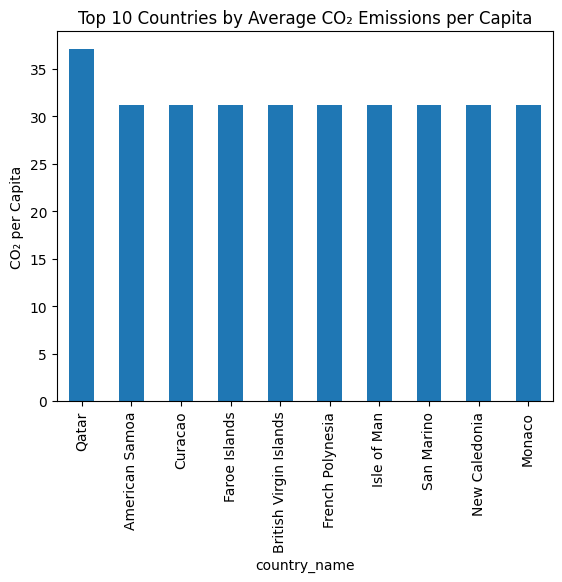

In [87]:
top_emitters.plot(kind="bar")
plt.title("Top 10 Countries by Average CO₂ Emissions per Capita")
plt.ylabel("CO₂ per Capita")
plt.show()


A small number of countries exhibit significantly higher CO₂ emissions per capita.
Using median aggregation reduces the impact of extreme outliers and provides a more robust comparison.


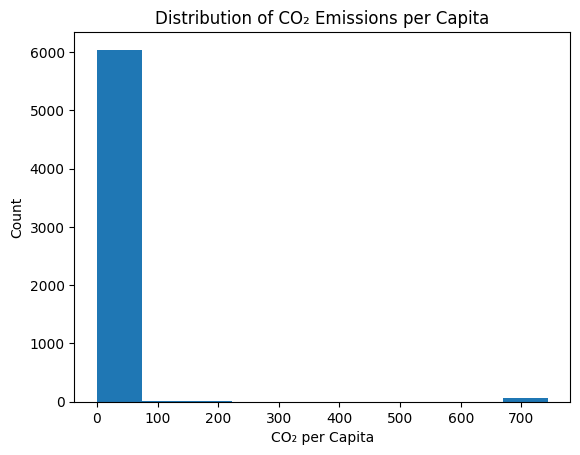

In [59]:
plt.figure()
plt.hist(df["CO2_per_capita"])
plt.title("Distribution of CO₂ Emissions per Capita")
plt.xlabel("CO₂ per Capita")
plt.ylabel("Count")
plt.show()


The distribution of CO₂ emissions per capita is highly right-skewed.
This indicates that while most countries emit relatively low CO₂ per person,
a small number of countries act as extreme emitters, driving the long tail.


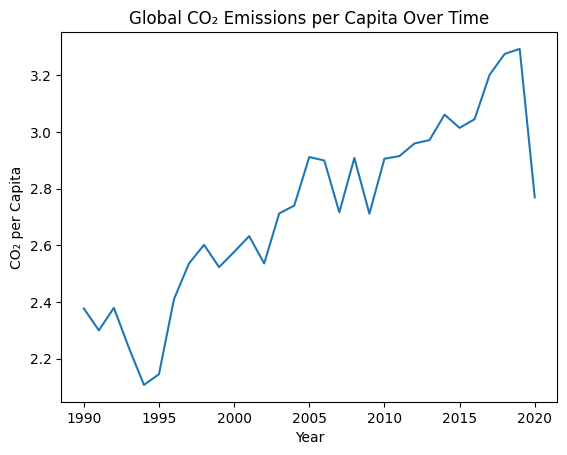

In [65]:
yearly_trend = df.groupby("year")["CO2_per_capita"].median()

plt.plot(yearly_trend)
plt.title("Global CO₂ Emissions per Capita Over Time")
plt.xlabel("Year")
plt.ylabel("CO₂ per Capita")
plt.show()


Global CO₂ emissions per capita show a gradual upward trend over time.
Median-based aggregation was used to reduce distortion from extreme values
observed in small territories, resulting in a more stable and realistic trend.


# For Renewable column vs co2 per capita
“For exploratory analysis, rows with missing renewable values were excluded to avoid misleading patterns.”

In [95]:
df_renew = df.dropna(subset=["Renewable_Consumption_Pct"])


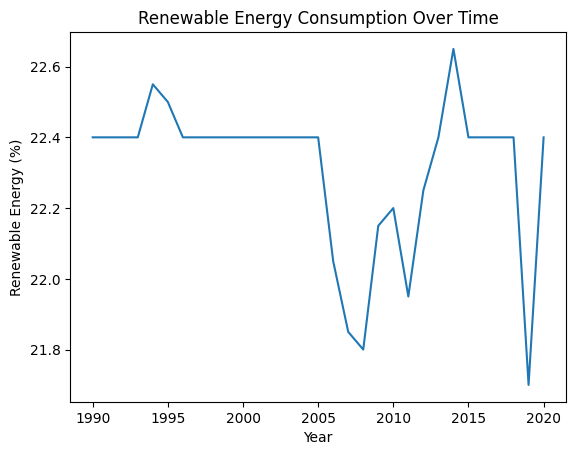

In [96]:
#renew vs year
renew_trend = df.groupby("year")["Renewable_Consumption_Pct"].median()

plt.plot(renew_trend)
plt.title("Renewable Energy Consumption Over Time")
plt.xlabel("Year")
plt.ylabel("Renewable Energy (%)")
plt.show()


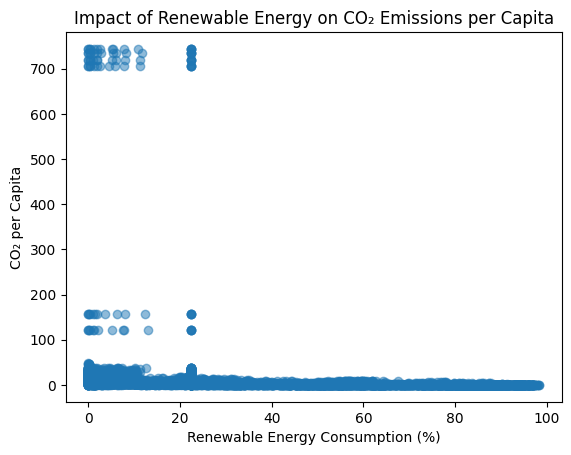

In [113]:
#Renewable Energy vs CO₂ per Capita
plt.figure()
plt.scatter(df["Renewable_Consumption_Pct"], df["CO2_per_capita"], alpha=0.5)
plt.xlabel("Renewable Energy Consumption (%)")
plt.ylabel("CO₂ per Capita")
plt.title("Impact of Renewable Energy on CO₂ Emissions per Capita")
plt.show()


The scatter plot shows a weak inverse relationship between renewable energy consumption and CO₂ emissions per capita, suggesting that renewable adoption alone is insufficient to significantly reduce emissions.


In [112]:
# Feature correlation
corr_with_target = (
    df.select_dtypes(include="number")
      .corr()["CO2_per_capita"]
      .sort_values(ascending=False)
)

corr_with_target



,CO2_per_capita
CO2_per_capita,1.000000
CO2_per_GDP_PPP,0.805416
CO2_Intensity,0.252419
year,0.157957
N2O_CO2e,-0.031815
Methane_CO2e,-0.034157
Renewable_Consumption_Pct,-0.137069


“Positively correlated variables act as reinforcing factors for CO₂ emissions, while negatively correlated variables show a mitigating association.”Methane_CO2e → −0.034
& N2O_CO2e → −0.032,,,Methane and N₂O emissions show negligible linear association with CO₂ emissions per capita.


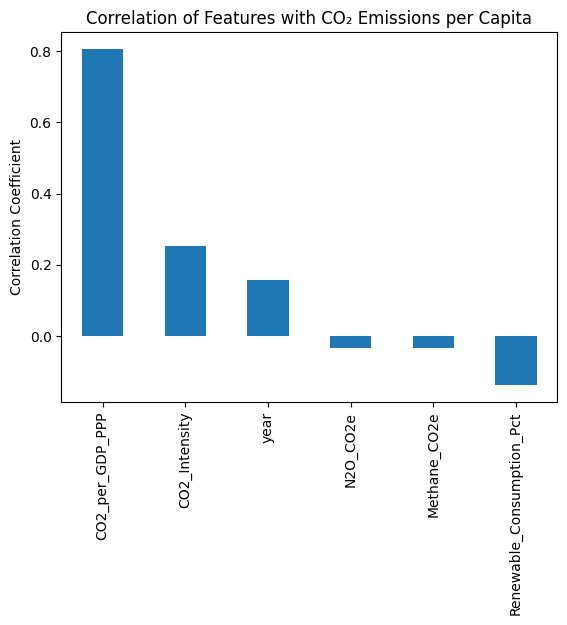

In [110]:
# correlation bar chart
plt.figure()
corr_with_target.drop("CO2_per_capita").plot(kind="bar")
plt.title("Correlation of Features with CO₂ Emissions per Capita")
plt.ylabel("Correlation Coefficient")
plt.show()


The correlation bar plot is consistent with the numerical correlation values and highlights the relative strength and direction of associations with CO₂ emissions per capita.


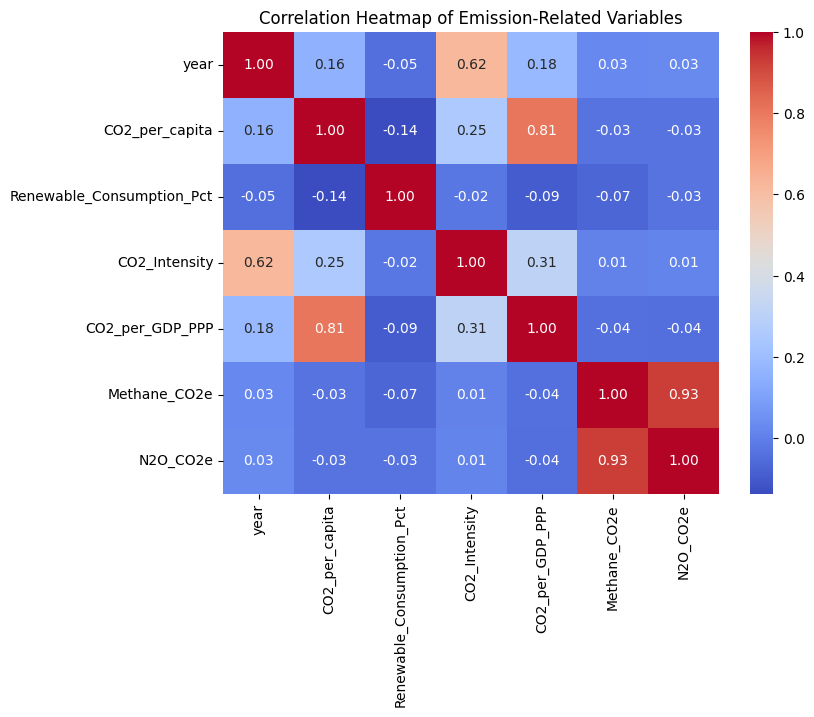

In [111]:
plt.figure(figsize=(8,6))
sns.heatmap(
    df.select_dtypes(include="number").corr(),
    annot=True,
    cmap="coolwarm",
    fmt=".2f"
)
plt.title("Correlation Heatmap of Emission-Related Variables")
plt.show()


The correlation heatmap confirms the feature-wise relationships observed earlier.
CO₂ per GDP (PPP) shows the strongest positive association with CO₂ emissions per capita,
followed by emission intensity. Renewable energy consumption exhibits a weak but negative
association, indicating a mitigating effect. Methane and N₂O emissions are highly correlated
with each other but show negligible direct association with CO₂ per capita.


## Feature Selection
Only numerical features relevant to CO₂ emissions were selected for baseline modeling to ensure simplicity and interpretability.


In [124]:
numeric_df = df.select_dtypes(include="number")
numeric_df.head()


,year,CO2_per_capita,Renewable_Consumption_Pct,CO2_Intensity,CO2_per_GDP_PPP,Methane_CO2e,N2O_CO2e
0,1990,0.191389,23.0,23.745049,23.745049,6735.57274,2841.412942
1,1991,0.180674,23.7,28.254785,28.254785,7018.87361,2930.139362
2,1992,0.126517,27.4,31.210332,31.210332,7124.43448,2886.076981
3,1993,0.109106,28.5,31.040200,31.040200,7209.86285,2926.050600
4,1994,0.096638,30.1,29.539308,29.539308,7462.89122,2758.944020


## Target Variable
'CO2_per_capita' was selected as the target variable for regression modeling.


In [125]:
X = numeric_df.drop(columns=["CO2_per_capita"])
y = numeric_df["CO2_per_capita"]


## Train-Test Split
The dataset was split into training and testing sets to evaluate model generalization.


In [126]:
# Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


## Baseline Models
Two baseline regression models were implemented to establish performance benchmarks:
- Linear Regression  
- Decision Tree Regressor


### **Baseline Model 1: Linear Regression**
This model captures linear relationships and serves as a standard baseline.


In [127]:
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)

r2_lr = r2_score(y_test, y_pred_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))

r2_lr, mae_lr, rmse_lr

(0.5683868408857913, 9.223322724217356, np.float64(40.79270950975803))

In [128]:
#Linear Regression – Train vs Test Score
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

train_score_lr = lr.score(X_train, y_train)
test_score_lr = lr.score(X_test, y_test)

train_score_lr, test_score_lr


(0.6662816666849076, 0.5683868408857913)

### **Baseline Model 2: Decision Tree Regressor**
This model captures non-linear relationships and feature interactions.


In [129]:
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)

y_pred_dt = dt.predict(X_test)

r2_dt = r2_score(y_test, y_pred_dt)
mae_dt = mean_absolute_error(y_test, y_pred_dt)
rmse_dt = np.sqrt(mean_squared_error(y_test, y_pred_dt))

r2_dt, mae_dt, rmse_dt

(0.9993565118842002, 0.5144942150985349, np.float64(1.5750903816959656))

In [130]:
#Decision Tree – Train vs Test Score
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)

train_score_dt = dt.score(X_train, y_train)
test_score_dt = dt.score(X_test, y_test)

train_score_dt, test_score_dt


(1.0, 0.9993565118842002)

## Baseline Model Comparison
The performance of both baseline models was compared using standard regression metrics.


In [131]:
# error comparison
comparison_df = pd.DataFrame({
    "Model": ["Linear Regression", "Decision Tree"],
    "R2 Score": [r2_lr, r2_dt],
    "MAE": [mae_lr, mae_dt],
    "RMSE": [rmse_lr, rmse_dt]
})

comparison_df


,Model,R2 Score,MAE,RMSE
0,Linear Regression,0.568387,9.223323,40.79271
1,Decision Tree,0.999357,0.514494,1.57509


In [132]:
# train_test comparison
comparison_df = pd.DataFrame({
    "Model": ["Linear Regression", "Decision Tree"],
    "Train R2": [train_score_lr, train_score_dt],
    "Test R2": [test_score_lr, test_score_dt]
})

comparison_df


,Model,Train R2,Test R2
0,Linear Regression,0.666282,0.568387
1,Decision Tree,1.000000,0.999357


## Baseline Model Interpretation

While the Decision Tree Regressor achieved very high performance metrics, this suggests overfitting due to its ability to closely fit training data.  
Linear Regression provides a more interpretable and stable baseline, making it suitable as a reference model for future advanced comparisons.


Linear Regression is selected as the baseline model due to its stable and comparable
training and testing performance, indicating reasonable generalization. Although the
Decision Tree achieves near-perfect accuracy, such performance is indicative of
overfitting and potential data leakage in structured datasets. Therefore, Linear
Regression provides a more reliable baseline for subsequent model comparison.


Overall, the analysis suggests that renewable energy adoption contributes to
reducing CO₂ emissions per capita, but its impact is currently limited when
compared to economic growth and emission intensity. This indicates that while
renewable energy is an important mitigation strategy, it must be accompanied
by structural economic changes and efficiency improvements to achieve
substantial emission reductions.
